<a href="https://colab.research.google.com/github/margamvinay7/Generative-AI/blob/main/EncoderDecorder.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
from tensorflow.keras import layers, models
import numpy as np
import matplotlib.pyplot as plt


(x_train, _), (x_test, _) = tf.keras.datasets.mnist.load_data()

x_train = x_train/255.0
x_test = x_test/255.0

x_train = np.expand_dims(x_train,axis=-1)
x_test = np.expand_dims(x_test, axis=-1)

print(f"x_train shape: {x_train.shape}")
print(f"x_test shape: {x_test.shape}")

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
x_train shape: (60000, 28, 28, 1)
x_test shape: (10000, 28, 28, 1)


In [2]:
encoder = models.Sequential([layers.InputLayer(input_shape=(28,28,1)),
                             layers.Conv2D(32, (3,3), activation='relu', strides=2, padding='same'),
                             layers.Conv2D(64, (3,3), activation='relu', strides=2, padding='same'),
                             layers.Flatten(),
                             layers.Dense(64, activation='relu')])

decoder = models.Sequential([layers.InputLayer(input_shape=(64,)),
                             layers.Dense(7*7*64, activation='relu'),
                             layers.Reshape((7,7,64)),
                             layers.Conv2DTranspose(64, (3,3), activation='relu', strides=2, padding='same'),
                             layers.Conv2DTranspose(32, (3,3), activation='relu', strides=2, padding='same'),
                             layers.Conv2DTranspose(1, (3,3), activation='sigmoid', padding='same')])

autoencoder = models.Sequential([encoder,decoder])
autoencoder.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ sequential (Sequential)         │ (None, 64)             │       219,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ sequential_1 (Sequential)       │ (None, 28, 28, 1)      │       259,521 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 479,105 (1.83 MB)

 Trainable params: 479,105 (1.83 MB)

 Non-trainable params: 0 (0.00 B)

In [3]:
encoder.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 14, 14, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 7, 7, 64)       │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 3136)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │       200,768 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 219,584 (857.75 KB)

 Trainable params: 219,584 (857.75 KB)

 Non-trainable params: 0 (0.00 B)

In [4]:
decoder.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_1 (Dense)                 │ (None, 3136)           │       203,840 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ reshape (Reshape)               │ (None, 7, 7, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_transpose                │ (None, 14, 14, 64)     │        36,928 │
│ (Conv2DTranspose)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_transpose_1              │ (None, 28, 28, 32)     │        18,464 │
│ (Conv2DTranspose)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_transpose_2              │ (None, 28, 28, 1)      │           289 │
│ (Conv2DTranspose)               │                        │               │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 259,521 (1013.75 KB)

 Trainable params: 259,521 (1013.75 KB)

 Non-trainable params: 0 (0.00 B)

In [11]:
autoencoder.compile(optimizer='adam', loss='binary_crossentropy',metrics=['accuracy'])

In [12]:
autoencoder.fit(x_train, x_train, epochs=25, batch_size=128, validation_data=(x_test, x_test))

Epoch 1/25
469/469 ━━━━━━━━━━━━━━━━━━━━ 10s 14ms/step - accuracy: 0.8149 - loss: 0.0806 - val_accuracy: 0.8144 - val_loss: 0.0693
Epoch 2/25
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.8152 - loss: 0.0697 - val_accuracy: 0.8144 - val_loss: 0.0689
Epoch 3/25
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.8158 - loss: 0.0689 - val_accuracy: 0.8144 - val_loss: 0.0681
Epoch 4/25
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.8153 - loss: 0.0685 - val_accuracy: 0.8144 - val_loss: 0.0677
Epoch 5/25
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.8156 - loss: 0.0681 - val_accuracy: 0.8144 - val_loss: 0.0675
Epoch 6/25
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.8154 - loss: 0.0677 - val_accuracy: 0.8144 - val_loss: 0.0674
Epoch 7/25
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.8154 - loss: 0.0674 - val_accuracy: 0.8144 - val_loss: 0.0671
Epoch 8/25
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.8153 - loss: 0.0672 - val_accuracy: 

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


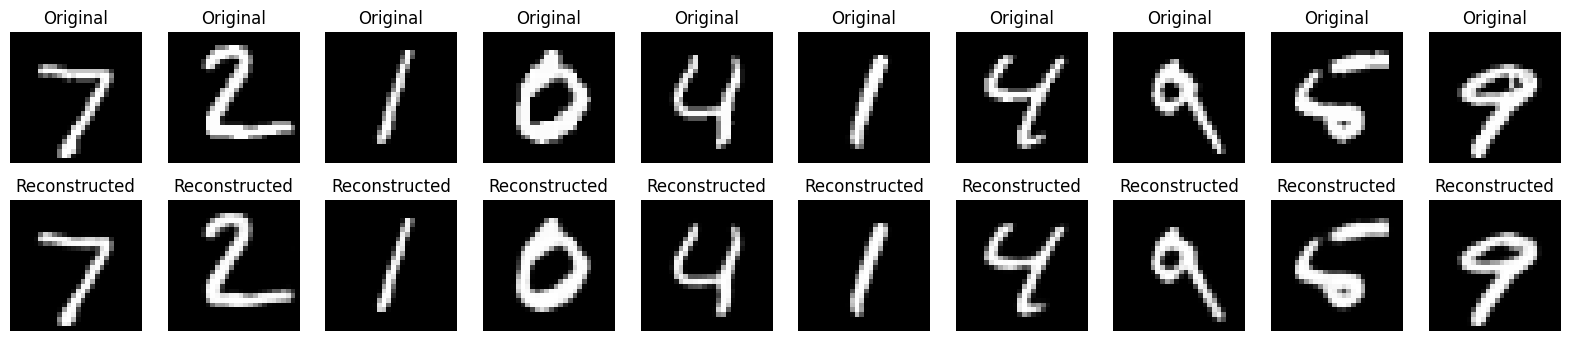

In [14]:
from PIL import Image


image = Image.open("7_prediction.jpeg").convert("L")  # Convert to grayscale
image = image.resize((28, 28))                    # Resize to match model input
image = np.array(image, dtype=np.float32) / 255.0 # Normalize
image = np.expand_dims(image, axis=-1)            # Add channel dimension (28, 28, 1)
image = np.expand_dims(image, axis=0)

# Predict
# decoded_image = autoencoder.predict(x_test)
decoded_images = autoencoder.predict(x_test)

n = 10
plt.figure(figsize=(20,4))

for i in range(n):
    ax = plt.subplot(2, n, i+1)
    plt.imshow(x_test[i], cmap="gray")
    plt.title("Original")
    plt.gray()
    ax.axis('off')

    ax = plt.subplot(2, n, i+1+n)
    plt.imshow(decoded_images[i], cmap="gray")
    plt.title("Reconstructed")
    plt.gray()
    ax.axis('off')

plt.show()




# Visualize output

# plt.imshow(decoded_image[0].squeeze(), cmap="gray")
# plt.title("Reconstructed")
# plt.axis("off")
# plt.show()